# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = '\\Results\\f1_d5_GA\\Training d2-d11\\'
Add_on_path = "\\Results\\Forecast_5_training_sample\\"
Add_on_path = "\\Results\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_rev = json_to_df(current_directory + Add_on_path +  'Exp_revenue.json')
df_RT_rev = json_to_df(current_directory + Add_on_path + 'RT_revenue.json')


In [4]:
print(df_Exp_rev)
print(df_RT_rev)

        f3_d5_upd62_t63  f2_d5_upd62_t63  f1_d5_upd62_t63
sto         2961.701719      2642.603092      2493.115440
det         7005.076660      2874.760999      7588.774124
learn       2662.565734      2439.032266      2382.864960
oracle     26881.519688     26881.519688     26881.519688
rule        3367.876257      2754.986021      2124.957413
        f3_d5_upd62_t63  f2_d5_upd62_t63  f1_d5_upd62_t63
sto         -363.571289      1710.428714      3157.922260
det         -353.891769      2849.226839     25902.146108
learn       1019.363339      1735.624112      3012.651570
oracle     26881.519688     26881.519688     26881.519688
rule        -318.018882      1290.241386      1678.068158


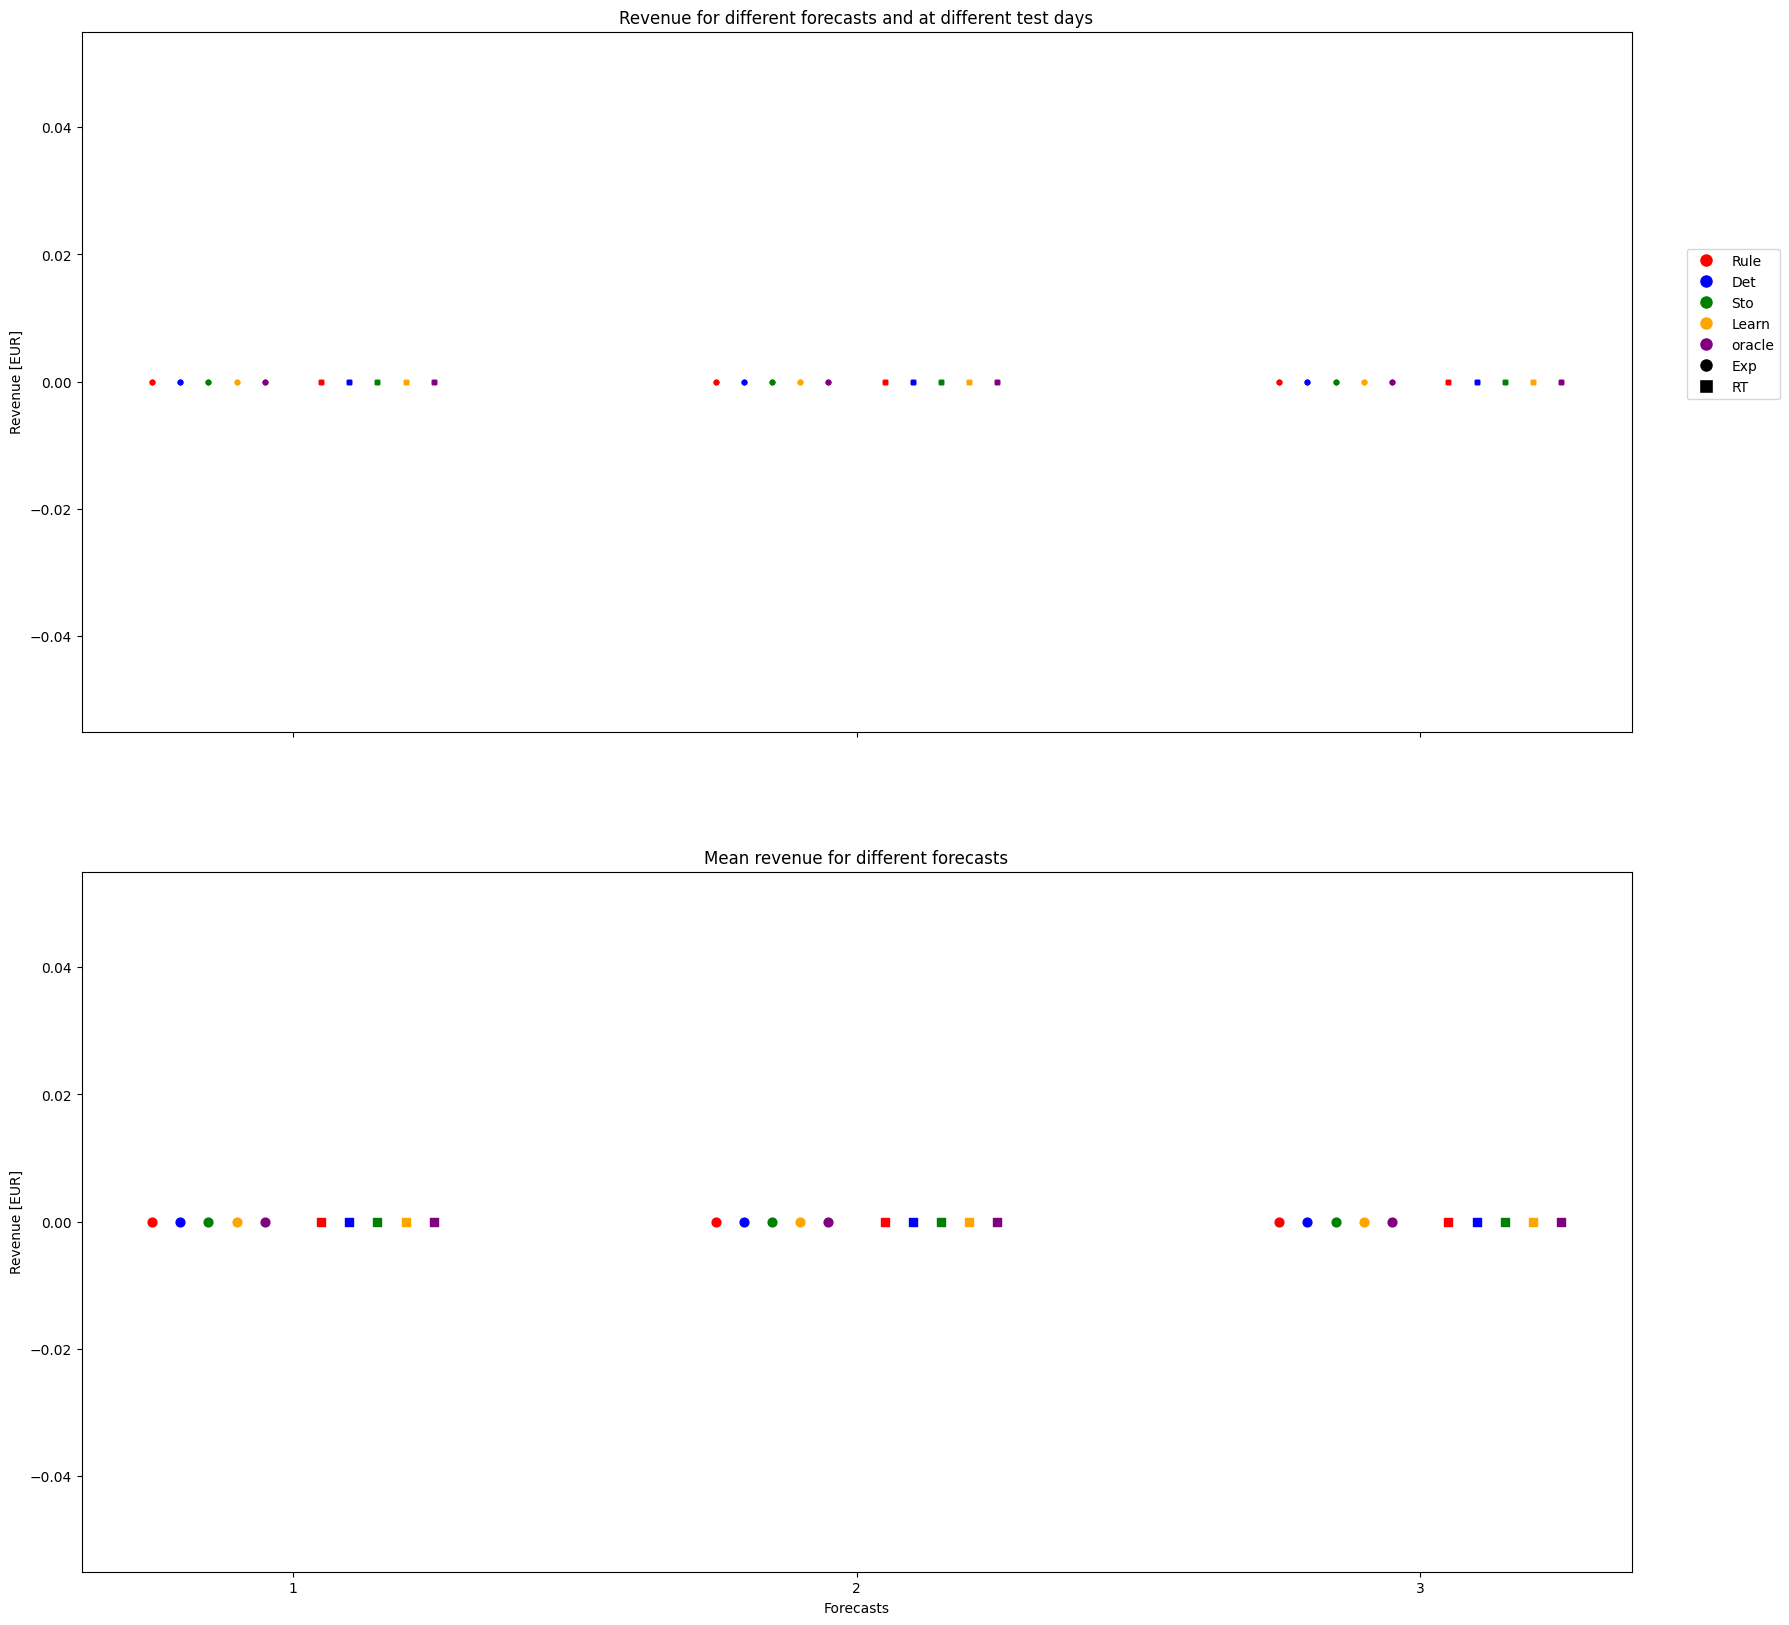

In [5]:
SampleSizes = [2,4,5,7,9,11]
forecast = [1,2,3]
#SampleSizes = [5]
Array = Create_Array_from_Rev(df_Exp_rev,df_RT_rev,NumForecasts=3, SampleSizes=SampleSizes)
xtick_names = forecast
marker_size = 10
marker_size_2 = 40
plot_Revenue_Test(Array,xtick_names = xtick_names,marker_size = marker_size, marker_size_2 = marker_size_2,visualize_forecasts = True)

For a fixed training size, see how the different days affects the results

In [ ]:
fixd5 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]

In [ ]:
data = df_RT_rev[fixd5].T
models = ['det','learn','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(20,8))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [ ]:
df_RT_rev[fixd5].mean(axis=1)

Check on of the days:

In [4]:
f = 1
d = 5
upd = 62
t = upd+1
fixd5 = [f'f{f}_d{d}_upd{upd}_t{t}' ]
print(fixd5)

['f1_d5_upd62_t63']


In [ ]:
data = df_RT_rev[fixd5].T
models = ['det','learn','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT revenue
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [7]:
# Select plot parameters
choose_id = fixd5[0]
save = True #True or False
model = 'Det' # Oracle, Rule, Det, Sto, Learn,
rev_plot = 'Det' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, rev_plot);

Test case:  f1_d5_upd62_t63
+----------+----------+---------+-----------------+--------------+------------+
|          |   Oracle |    Rule |   Deterministic |   Stochastic |   Learning |
+==========+==========+=========+=================+==============+============+
| RT       |  26881.5 | 1678.07 |        25902.1  |      3157.92 |    3012.65 |
+----------+----------+---------+-----------------+--------------+------------+
| Expected |  26881.5 | 2124.96 |         7588.77 |      2493.12 |    2382.86 |
+----------+----------+---------+-----------------+--------------+------------+


In [ ]:
plot_coefficients_heatmap(results['Learn']['Bid'],save = True)
plt.show()

In [ ]:
#View plots
view_plots(model, rev_plot)


Investigate why SOC in the last hour shoots up to 8 in the rule-based model

### Test case: M1 D9 t10 
Case when stochastic model performs the best

In [ ]:
# Select plot parameters
choose_id = 'm1_d9_t10'
save = True #True or False
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
save_plots(current_directory, choose_id, save, model, with_acceptance, rev_plot)

In [ ]:
#View plots
model = 'Learn' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)

In [ ]:
#View plots
model = 'Sto' # Rule, Det, Sto, Learn,
rev_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT revenue)
view_plots(model, rev_plot)